In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
our_data = pd.read_csv('merged_data.csv')

In [21]:
print(our_data)

    Unnamed: 0    CZK/USD  Summed Monthly Cases
0   2020-03-01  24.042864                   NaN
1   2020-04-01  25.069682                3308.0
2   2020-05-01  25.012381                4374.0
3   2020-06-01  23.706455                1586.0
4   2020-07-01  23.145000                2686.0
5   2020-08-01  22.122381                4620.0
6   2020-09-01  22.679909                8044.0
7   2020-10-01  23.098409               46145.0
8   2020-11-01  22.357048              264339.0
9   2020-12-01  21.629913              188196.0
10  2021-01-01  21.474714              195363.0
11  2021-02-01  21.388100              266113.0
12  2021-03-01  22.002043              250706.0
13  2021-04-01  21.694591              296852.0
14  2021-05-01        NaN               98426.0


In [18]:
#functions to plot data
#get x axes
def get_x_axes(data):
    x = data.index
    return x

#get y axes
def get_y_axes(data, column):
    y = data[f'{column}']
    return y

#plot data
def plot_data(data, y, xticks, ylabel):
    x = get_x_axes(data)
    plt.plot(x, get_y_axes(data, y))# Plot some data on the axes.
    plt.xticks(x[::xticks])
    plt.xlabel('Date')  # Add an x-label to the axes.
    plt.ylabel(f'{ylabel}')  # Add a y-label to the axes.
    plt.title(f'Plotted data from {x[0]} until {x[-1]}')  # Add a title to the axes.
    #plt.legend()  # Add a legend.

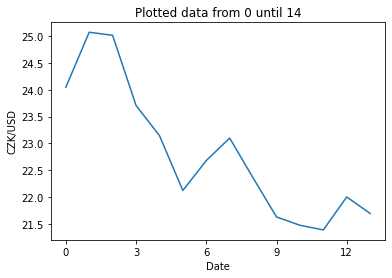

In [19]:
plot_data(our_data, 'CZK/USD', 3, 'CZK/USD')

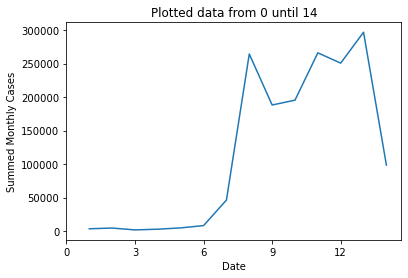

In [20]:
plot_data(data, 'Summed Monthly Cases', 3, 'Summed Monthly Cases')